# TODO:
- Create model and layers
- Review the differences in layers (mostly looking at the first numerical argument in the layer creation)
- Use a subset of the train/test data to create MVP

In [1]:
import sklearn as sk
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Setup constants
IMAGE_SHAPE=(128, 128, 3)

DATA_DIR = '../data'
DATA_FABRICATED_DIR = os.path.join(DATA_DIR, 'fabricated')

#IMAGE_TEST_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_test')
IMAGE_TEST_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_test')
#IMAGE_VALIDATION_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_validation')
IMAGE_VALIDATION_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_validation')
#IMAGE_TRAIN_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_train')
IMAGE_TRAIN_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_train')

SAVED_MODEL_DIR = os.path.join(DATA_DIR, 'models')

In [3]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=[IMAGE_SHAPE[0], IMAGE_SHAPE[1], IMAGE_SHAPE[2]]))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  #optimizer='rmsprop',
                  metrics=['acc'])
    return model

create_model()

In [4]:
def create_data_generator():
    # All images will be rescaled by 1./255
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            # This is the target directory
            IMAGE_TRAIN_DIR,
            target_size=[IMAGE_SHAPE[0], IMAGE_SHAPE[1]],
            batch_size=20,
            # Since we use binary_crossentropy loss, we need binary labels
            class_mode='binary')

    validation_generator = validation_datagen.flow_from_directory(
            IMAGE_VALIDATION_DIR,
            target_size=[IMAGE_SHAPE[0], IMAGE_SHAPE[1]],
            batch_size=20,
            class_mode='binary')
    
    return [train_generator, validation_generator]

create_data_generator()

Found 864 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [5]:
model = create_model()
train_generator, validation_generator = create_data_generator()

history = model.fit_generator(
      train_generator,
      epochs=80,
      validation_data=validation_generator
)

Found 864 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Epoch 1/80
44/44 [==============================] - 27s 609ms/step - loss: 0.4560 - acc: 0.7888 - val_loss: 0.1082 - val_acc: 1.0000
Epoch 2/80
44/44 [==============================] - 25s 574ms/step - loss: 0.2658 - acc: 0.9034 - val_loss: 0.0550 - val_acc: 1.0000
Epoch 3/80
44/44 [==============================] - 25s 574ms/step - loss: 0.1977 - acc: 0.9205 - val_loss: 0.0895 - val_acc: 1.0000
Epoch 4/80
44/44 [==============================] - 25s 574ms/step - loss: 0.2076 - acc: 0.9193 - val_loss: 0.1813 - val_acc: 0.9259
Epoch 5/80
44/44 [==============================] - 25s 570ms/step - loss: 0.1499 - acc: 0.9443 - val_loss: 0.2578 - val_acc: 0.8519
Epoch 6/80
44/44 [==============================] - 25s 571ms/step - loss: 0.1297 - acc: 0.9568 - val_loss: 0.3451 - val_acc: 0.7407
Epoch 7/80
44/44 [==============================] - 25s 575ms/step - loss: 0.1159 - acc: 0.9523 - val_loss: 0.0104 - val_

44/44 [==============================] - 26s 590ms/step - loss: 0.0111 - acc: 0.9966 - val_loss: 2.5337e-04 - val_acc: 1.0000
Epoch 62/80
44/44 [==============================] - 26s 582ms/step - loss: 0.0162 - acc: 0.9932 - val_loss: 1.9483e-04 - val_acc: 1.0000
Epoch 63/80
44/44 [==============================] - 26s 585ms/step - loss: 0.0171 - acc: 0.9909 - val_loss: 8.6704e-04 - val_acc: 1.0000
Epoch 64/80
44/44 [==============================] - 26s 586ms/step - loss: 0.0174 - acc: 0.9943 - val_loss: 8.6339e-05 - val_acc: 1.0000
Epoch 65/80
44/44 [==============================] - 25s 579ms/step - loss: 0.0261 - acc: 0.9898 - val_loss: 1.9597e-04 - val_acc: 1.0000
Epoch 66/80
44/44 [==============================] - 26s 580ms/step - loss: 0.0161 - acc: 0.9920 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 67/80
44/44 [==============================] - 26s 580ms/step - loss: 0.0186 - acc: 0.9920 - val_loss: 2.7533e-04 - val_acc: 1.0000
Epoch 68/80
44/44 [==============================]

In [6]:
train_generator, validation_generator = create_data_generator()
def show_images_for_generator(generator):
    cnt = 0
    batch = next(generator)
    print(batch[1])
    #print(batch[0][0])
    for img in batch[0]:
        cnt += 1
        plt.figure(cnt)

        imgplot = plt.imshow(array_to_img(img))
        if cnt == 5:
            break

Found 864 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


[1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


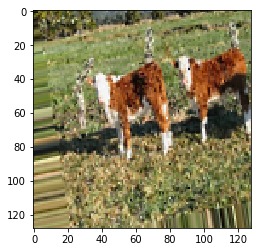

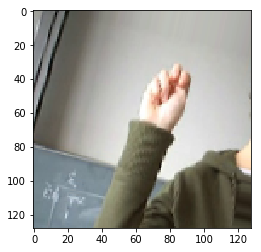

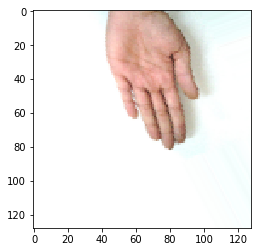

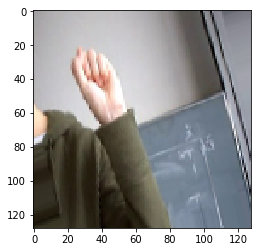

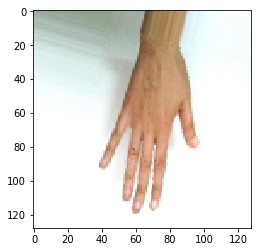

In [7]:
show_images_for_generator(train_generator)

In [8]:
# show_images_for_generator(validation_generator)

## Test Model

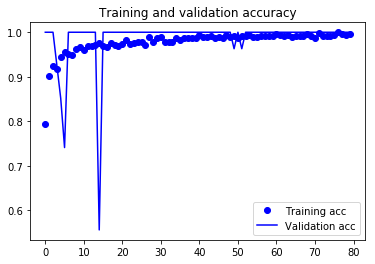

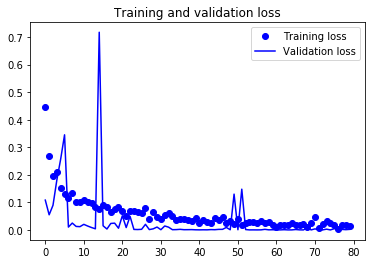

In [9]:
def desplay_trajectory(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
desplay_trajectory(history)

### Test model using unseen images

In [10]:

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        IMAGE_TEST_DIR,
        target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
        batch_size=82,
        class_mode='binary')

Found 82 images belonging to 2 classes.


In [11]:
batch = next(test_generator)
images = batch[0]
classes = batch[1]
predictions = model.predict(images)

In [12]:
image_map = {}
i = 0
for image in images:
    image_map[i] = image
    i += 1

In [13]:
test_image_results = pd.DataFrame({
    'images': list(image_map.keys()),
    'prediction': predictions.flatten(),
    'classes': classes
}) \
.sort_values('prediction', ascending=False)

test_image_results

classes  images  prediction
35      1.0      35    1.000000
48      1.0      48    1.000000
28      1.0      28    1.000000
76      1.0      76    1.000000
75      1.0      75    1.000000
33      1.0      33    1.000000
34      1.0      34    1.000000
39      1.0      39    1.000000
40      1.0      40    1.000000
42      1.0      42    1.000000
46      1.0      46    1.000000
50      1.0      50    1.000000
24      1.0      24    1.000000
53      1.0      53    1.000000
55      1.0      55    1.000000
57      1.0      57    1.000000
59      1.0      59    1.000000
61      1.0      61    1.000000
62      1.0      62    1.000000
63      1.0      63    1.000000
65      1.0      65    1.000000
69      1.0      69    1.000000
25      1.0      25    1.000000
70      1.0      70    1.000000
23      1.0      23    1.000000
16      1.0      16    1.000000
2       1.0       2    1.000000
3       1.0       3    1.000000
21      1.0      21    1.000000
4       1.0       4    1.000000
..      ...     ...         ...
36      0.0      36    0.000158
29      0.0      29    0.000127
38      0.0      38    0.000118
64      0.0      64    0.000077
45      0.0      45    0.000057
27      0.0      27    0.000057
26      0.0      26    0.000050
18      0.0      18    0.000048
37      0.0      37    0.000047
32      0.0      32    0.000041
1       0.0       1    0.000040
5       0.0       5    0.000036
20      0.0      20    0.000031
44      0.0      44    0.000030
22      0.0      22    0.000029
49      0.0      49    0.000020
68      0.0      68    0.000019
14      0.0      14    0.000018
71      0.0      71    0.000017
41      0.0      41    0.000016
8       0.0       8    0.000015
30      0.0      30    0.000014
52      0.0      52    0.000012
80      0.0      80    0.000012
78      0.0      78    0.000011
60      0.0      60    0.000007
31      0.0      31    0.000006
7       0.0       7    0.000005
81      0.0      81    0.000005
58      0.0      58    0.000004

[82 rows x 3 columns]

In [14]:

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [15]:
# fnames = [os.path.join(IMAGE_TEST_DIR, fname) for fname in test_image_results.filename]

#imgs = [load_img(fname, target_size=(100,100)) for fname in fnames]
imgs = [array_to_img(image_map[img]) for img in test_image_results.images]
show_images(imgs, 5, test_image_results.prediction)

## Save Model

In [16]:
def ensure_model_directory_exists():
    try:
        os.mkdir(SAVED_MODEL_DIR)
    except:
        print('Tried to create "{}" but it already exists'.format(SAVED_MODEL_DIR))

def save_model():
    ensure_model_directory_exists()

    last_item_accuracy = history.history['acc'][-1]
    timestamp_raw = str(datetime.datetime.now())
    timestamp_without_milliseconds = timestamp_raw.split('.')[0]
    
    model_filename = '{}___{}.h5'.format(timestamp_without_milliseconds, last_item_accuracy)
    model_filepath = os.path.join(SAVED_MODEL_DIR, model_filename)
    
    print('saving file {}'.format(model_filepath))

    model.save(model_filepath)
save_model()

Tried to create "../data/models" but it already exists
saving file ../data/models/2018-10-08 20:16:22___0.9953703692665806.h5
